In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import single_barplot

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,30,quoted,quoted,not quoted,not quoted,not quoted,-99,No,-99,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,10,quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,0,not quoted,not quoted,not quoted,not quoted,not quoted,-99,No,-99,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/


In [4]:
df_q8 = df.filter(regex='Q8')
df_q8.head()

,Q8_Who_is_AdressingRE_ProjectLead,Q8_Who_is_AdressingRE_BusinessAnalyst,Q8_Who_is_AdressingRE_RequirementEngineer,Q8_Who_is_AdressingRE_SolutionArchitect,Q8_Who_is_AdressingRE_DataScientist,Q8_Who_is_AdressingRE_Developer',Q8_Who_is_AdressingRE_Tester,Q8_Who_is_AdressingRE_Others,Q8_Who_is_AdressingRE_Others_Free
2,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,-99
3,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
4,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
5,quoted,not quoted,not quoted,quoted,quoted,quoted,not quoted,not quoted,-99
6,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,-99


In [5]:
#Responses as others

df_q8_others = df_q8.filter(regex='Others')
df_q8_others

for c in df_q8_others.columns:
    print(c)
    print(df_q8_others[c].value_counts())

Q8_Who_is_AdressingRE_Others
not quoted    175
-77            82
quoted         19
Name: Q8_Who_is_AdressingRE_Others, dtype: int64
Q8_Who_is_AdressingRE_Others_Free                  
-99                                                              175
-66                                                               82
Machine Learning Engineer                                          1
Subject Matter Expert                                              1
Analistas de segurança                                             1
Operational Research Analyst                                       1
My master's program mentor                                         1
software engineer                                                  1
Me, student and developer                                          1
SRE Team, mainly the Data Lead                                     1
Product Owner                                                      1
Business                                                 

In [6]:
# Pandas DataFrame [quoted per columns]

dict_q8 = {}
for c in df_q8.columns:
    if "Free" and "Others" not in c:
        role = c.split('_')
        dict_q8[role[4:][0]] = df_q8[c].value_counts()['quoted']

df_q8_quoted = pd.DataFrame(data={'Position': list(dict_q8.keys()), 'Answers': list(dict_q8.values())})
df_q8_quoted = df_q8_quoted.sort_values('Answers', ascending=False)
df_q8_quoted

,Position,Answers
0,ProjectLead,99
4,DataScientist,95
1,BusinessAnalyst,50
5,Developer',37
3,SolutionArchitect,24
2,RequirementEngineer,20
6,Tester,2


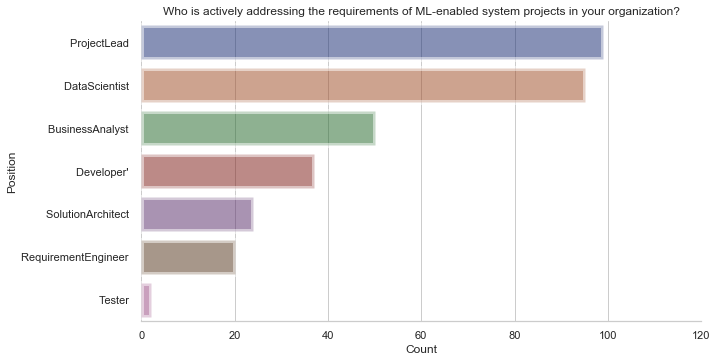

In [7]:
single_barplot(df_q8_quoted, "Answers", "Position",
               title="Who is actively addressing the requirements of ML-enabled system projects in your organization?",
               x_label="Count", y_label="Position", x_label_rotation=0)

In [8]:
for other in list(df['Q8_Who_is_AdressingRE_Others_Free                  '].unique()):
    print(other)

-99
Director
Machine Learning Engineer
Product owner
Stream Lead Application Development, Requirements Engineering
Architects, Tech Leads and managers
System Engineer
CEO
No one
Product owners. Customers
Group of tech leads
Business 
Subject Matter Expert
Product Owner
SRE Team, mainly the Data Lead
Me, student and developer
software engineer
My master's program mentor
Operational Research Analyst
Analistas de segurança
-66
